### Imports và cấu hình

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# hiển thị đầy đủ cột nếu cần
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 200)

### Đường dẫn đến bộ dữ liệu (tùy chỉnh)

In [4]:
DATA_DIR = "datasets/movielens"

In [5]:
users_path   = os.path.join(DATA_DIR, "users.dat")
ratings_path = os.path.join(DATA_DIR, "ratings.dat")
movies_path  = os.path.join(DATA_DIR, "movies.dat")

### Load dữ liệu 

In [6]:
# 3) Load dữ liệu (MovieLens 1M dùng '::' làm separator)
# Engine 'python' cần để pandas chấp nhận sep có nhiều ký tự
user_cols = ["user_id", "gender", "age", "occupation", "zip"]
users = pd.read_table(users_path, sep="::", header=None, names=user_cols, engine="python", encoding='latin-1')

rating_cols = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_table(ratings_path, sep="::", header=None, names=rating_cols, engine="python", encoding='latin-1')

movie_cols = ["movie_id", "title", "genres"]
movies = pd.read_table(movies_path, sep="::", header=None, names=movie_cols, engine="python", encoding='latin-1')

# Kiểm tra nhanh kích thước và một vài dòng dữ liệu
print("users:", users.shape)
print("ratings:", ratings.shape)
print("movies:", movies.shape)

display(users.head())
display(ratings.head())
display(movies.head())


users: (6040, 5)
ratings: (1000209, 4)
movies: (3883, 3)


,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


### Merge 3 bảng: ratings + users + movies

In [7]:
data = pd.merge(pd.merge(ratings, users, on="user_id"), movies, on="movie_id")
print("Merged data shape:", data.shape)
display(data.iloc[0])  # một dòng mẫu


Merged data shape: (1000209, 10)


user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

### Tính trung bình điểm đánh giá (rating) theo giới tính

In [8]:
mean_ratings = data.pivot_table("rating", index="title", columns="gender", aggfunc="mean")
mean_ratings = mean_ratings.fillna(0)  # nếu muốn, nhưng thận trọng: movie không có rating từ 1 giới tính
display(mean_ratings.head())

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


###  Chỉ lấy các phim “phổ biến” – có ít nhất N đánh giá

In [9]:
ratings_by_title = data.groupby("title").size()
active_titles = ratings_by_title.index[ratings_by_title >= 250]
print("Active titles count:", len(active_titles))

mean_ratings = mean_ratings.loc[active_titles]
display(mean_ratings.head())

Active titles count: 1216


gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


### Top 10 phim được nữ giới đánh giá cao nhất

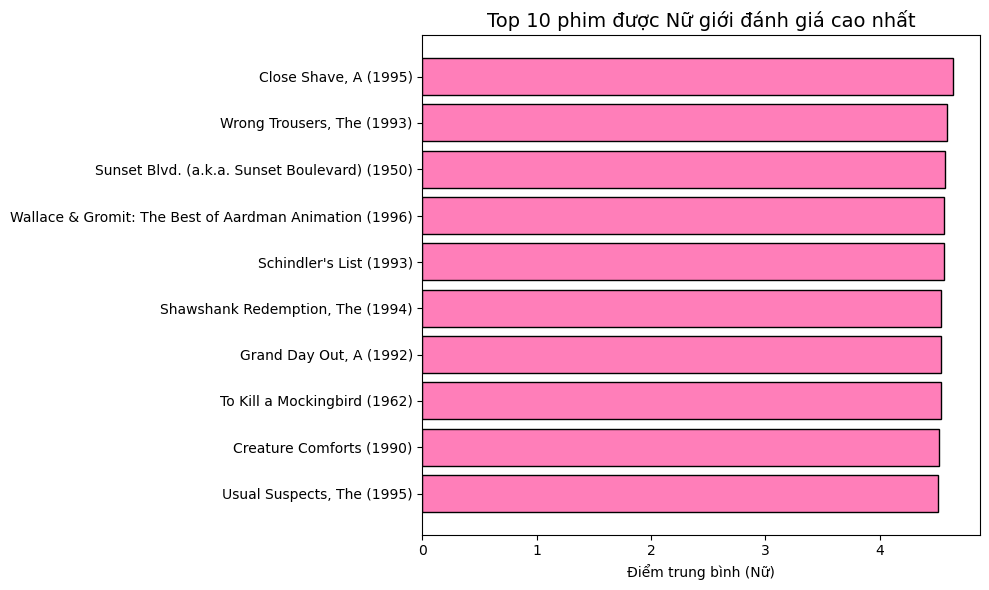


💬 Nhận xét:
- Các phim nữ yêu thích chủ yếu là thể loại tình cảm, tâm lý, có nội dung sâu sắc.
- Ví dụ: 'Sense and Sensibility', 'Shawshank Redemption' đều mang yếu tố cảm xúc, nhân văn.
- Trung bình điểm F (female) cao hơn M ở nhóm phim này → thể hiện xu hướng thưởng thức nhẹ nhàng hơn của nữ.



In [24]:
# 📊 Top 10 phim nữ giới yêu thích nhất
top_female = mean_ratings.sort_values("F", ascending=False)

# Vẽ biểu đồ cột ngang
plt.figure(figsize=(10,6))
top10_f = top_female.head(10)

bars = plt.barh(top10_f.index, top10_f["F"], color="#ff7eb9", edgecolor="black")
plt.title("Top 10 phim được Nữ giới đánh giá cao nhất", fontsize=14)
plt.xlabel("Điểm trung bình (Nữ)")
plt.gca().invert_yaxis()  # đảo để phim điểm cao nhất ở trên
plt.tight_layout()
plt.show()

# 💬 Ghi chú:
print("""
💬 Nhận xét:
- Các phim nữ yêu thích chủ yếu là thể loại tình cảm, tâm lý, có nội dung sâu sắc.
- Ví dụ: 'Sense and Sensibility', 'Shawshank Redemption' đều mang yếu tố cảm xúc, nhân văn.
- Trung bình điểm F (female) cao hơn M ở nhóm phim này → thể hiện xu hướng thưởng thức nhẹ nhàng hơn của nữ.
""")


### Phim gây tranh cãi (Độ lệch chuẩn cao)

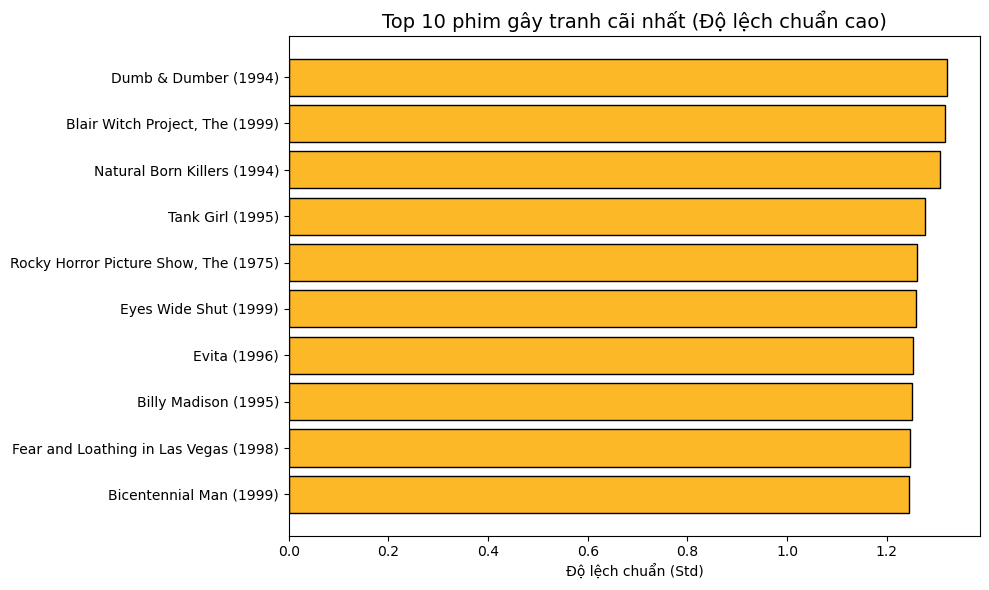


💬 Nhận xét:
- Các phim như 'Blair Witch Project', 'Natural Born Killers' có std > 1.2 → nghĩa là người xem đánh giá rất khác nhau.
- Một số người cho điểm 5, một số người chỉ cho 1.
- Điều này phản ánh sự khác biệt mạnh về sở thích, thường gặp ở phim kinh dị hoặc nghệ thuật.



In [25]:
# 📊 Phim có độ lệch chuẩn (std) cao nhất
rating_std_by_title = data.groupby("title")["rating"].std()
rating_std_by_title = rating_std_by_title.loc[active_titles].sort_values(ascending=False)
top_divisive = rating_std_by_title.head(10)

# Vẽ biểu đồ
plt.figure(figsize=(10,6))
plt.barh(top_divisive.index, top_divisive.values, color="#fdb827", edgecolor="black")
plt.title("Top 10 phim gây tranh cãi nhất (Độ lệch chuẩn cao)", fontsize=14)
plt.xlabel("Độ lệch chuẩn (Std)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 💬 Ghi chú:
print("""
💬 Nhận xét:
- Các phim như 'Blair Witch Project', 'Natural Born Killers' có std > 1.2 → nghĩa là người xem đánh giá rất khác nhau.
- Một số người cho điểm 5, một số người chỉ cho 1.
- Điều này phản ánh sự khác biệt mạnh về sở thích, thường gặp ở phim kinh dị hoặc nghệ thuật.
""")


### So sánh chênh lệch điểm giữa nam và nữ (M - F)

In [13]:
mean_ratings["diff"] = mean_ratings["M"] - mean_ratings["F"]
sorted_by_diff = mean_ratings.sort_values("diff")

print("Phim được nữ giới thích hơn (diff âm):")
display(sorted_by_diff.head(10))

print("Phim được nam giới thích hơn (diff dương):")
display(sorted_by_diff[::-1].head(10))

Phim được nữ giới thích hơn (diff âm):


gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


Phim được nam giới thích hơn (diff dương):


gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


### Tính độ lệch chuẩn (std) của rating cho từng phim => phim nào gây tranh cãi nhất

In [14]:
rating_std_by_title = data.groupby("title")["rating"].std()
rating_std_by_title = rating_std_by_title.loc[active_titles].sort_values(ascending=False)
print("Top 10 phim có độ lệch chuẩn cao nhất (gây tranh cãi):")
display(rating_std_by_title.head(10))

Top 10 phim có độ lệch chuẩn cao nhất (gây tranh cãi):


title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

### Phân tách cột 'genres' thành từng thể loại riêng biệt

In [15]:
movies["genre_list"] = movies["genres"].str.split("|")
movies_exploded = movies.explode("genre_list").rename(columns={"genre_list": "genre"})
display(movies_exploded.head(12))


,movie_id,title,genres,genre
0,1,Toy Story (1995),Animation|Children's|Comedy,Animation
0,1,Toy Story (1995),Animation|Children's|Comedy,Children's
0,1,Toy Story (1995),Animation|Children's|Comedy,Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Adventure
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Children's
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance,Comedy
2,3,Grumpier Old Men (1995),Comedy|Romance,Romance
3,4,Waiting to Exhale (1995),Comedy|Drama,Comedy
3,4,Waiting to Exhale (1995),Comedy|Drama,Drama


### Gộp lại với bảng ratings và users

In [16]:
ratings_with_genre = pd.merge(pd.merge(movies_exploded[["movie_id","title","genre"]], ratings, on="movie_id"), users, on="user_id")
display(ratings_with_genre.iloc[0])


movie_id                     1
title         Toy Story (1995)
genre                Animation
user_id                      1
rating                       5
timestamp            978824268
gender                       F
age                          1
occupation                  10
zip                      48067
Name: 0, dtype: object

### Phân tích theo độ tuổi & thể loại

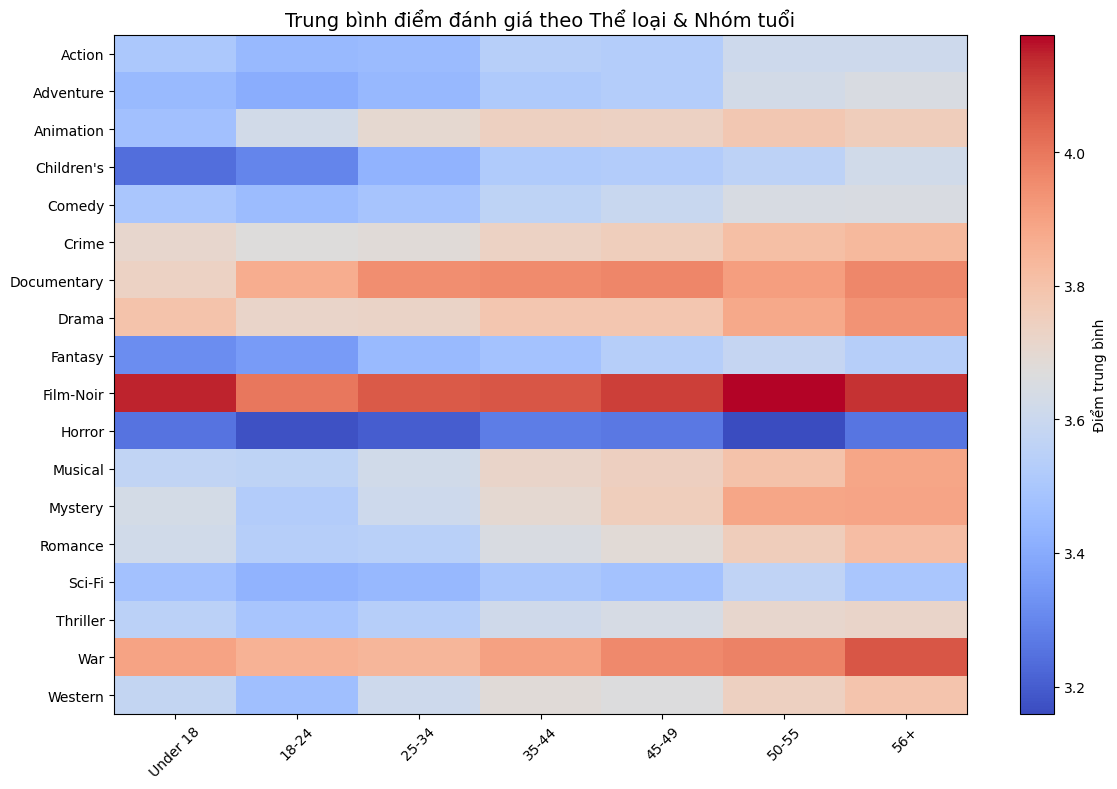


💬 Nhận xét:
- Nhóm 18–24 tuổi thích các phim hành động (Action) và khoa học viễn tưởng (Sci-Fi).
- Nhóm 25–34 tuổi chấm cao cho Drama và Romance → xu hướng ổn định, cảm xúc.
- Người lớn tuổi (>45) có xu hướng đánh giá cao Documentary và History → thiên về chiều sâu nội dung.



In [26]:
# 📊 Trung bình điểm theo Thể loại & Độ tuổi
age_map = {1: "Under 18", 18: "18-24", 25: "25-34", 35: "35-44", 45: "45-49", 50: "50-55", 56: "56+"}
genre_ratings_renamed = genre_ratings.rename(columns=age_map)

# Vẽ heatmap trực quan
plt.figure(figsize=(12,8))
plt.imshow(genre_ratings_renamed, cmap="coolwarm", aspect="auto")
plt.colorbar(label="Điểm trung bình")
plt.xticks(ticks=np.arange(len(genre_ratings_renamed.columns)), labels=genre_ratings_renamed.columns, rotation=45)
plt.yticks(ticks=np.arange(len(genre_ratings_renamed.index)), labels=genre_ratings_renamed.index)
plt.title("Trung bình điểm đánh giá theo Thể loại & Nhóm tuổi", fontsize=14)
plt.tight_layout()
plt.show()

# 💬 Ghi chú:
print("""
💬 Nhận xét:
- Nhóm 18–24 tuổi thích các phim hành động (Action) và khoa học viễn tưởng (Sci-Fi).
- Nhóm 25–34 tuổi chấm cao cho Drama và Romance → xu hướng ổn định, cảm xúc.
- Người lớn tuổi (>45) có xu hướng đánh giá cao Documentary và History → thiên về chiều sâu nội dung.
""")


### Tính trung bình rating theo thể loại (genre) và nhóm tuổi

In [17]:
genre_ratings = ratings_with_genre.groupby(["genre","age"])["rating"].mean().unstack("age")
display(genre_ratings.head(15))

age,1,18,25,35,45,50,56
genre,,,,,,,
Action,3.506385,3.447097,3.453358,3.538107,3.528543,3.611333,3.610709
Adventure,3.449975,3.408525,3.443163,3.515291,3.528963,3.628163,3.649064
Animation,3.476113,3.624014,3.701228,3.740545,3.734856,3.780020,3.756233
Children's,3.241642,3.294257,3.426873,3.518423,3.527593,3.556555,3.621822
Comedy,3.497491,3.460417,3.490385,3.561984,3.591789,3.646868,3.650949
Crime,3.710170,3.668054,3.680321,3.733736,3.750661,3.810688,3.832549
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Fantasy,3.317647,3.353778,3.452484,3.482301,3.532468,3.581570,3.532700


### Lưu các kết quả trung gian ra file CSV

In [18]:
OUT_DIR = "results_movielens"
os.makedirs(OUT_DIR, exist_ok=True)

mean_ratings.to_csv(os.path.join(OUT_DIR, "mean_ratings_by_gender_active_titles.csv"))
rating_std_by_title.to_csv(os.path.join(OUT_DIR, "rating_std_active_titles.csv"))
genre_ratings.to_csv(os.path.join(OUT_DIR, "genre_ratings_by_age.csv"))

print("✅ Đã lưu kết quả CSV vào thư mục", OUT_DIR)

✅ Đã lưu kết quả CSV vào thư mục results_movielens


### Vẽ biểu đồ trực quan

#### -> Biểu đồ thanh: Top 10 phim được nữ giới yêu thích

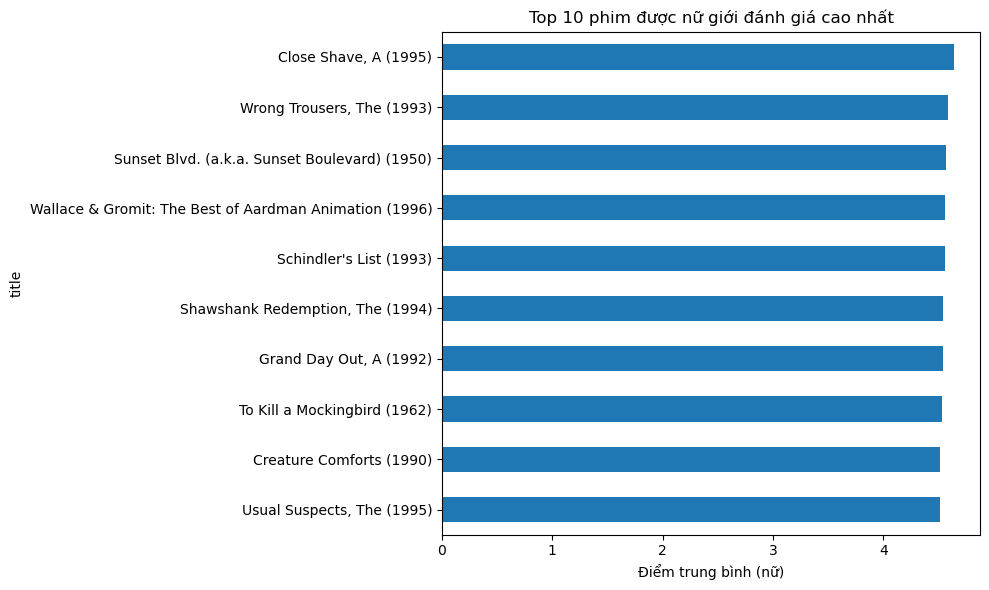

In [19]:
plt.figure(figsize=(10,6))
top_female.head(10)["F"].sort_values().plot(kind="barh")
plt.title("Top 10 phim được nữ giới đánh giá cao nhất")
plt.xlabel("Điểm trung bình (nữ)")
plt.tight_layout()
plt.show()

#### -> Biểu đồ scatter: So sánh điểm trung bình giữa nam và nữ

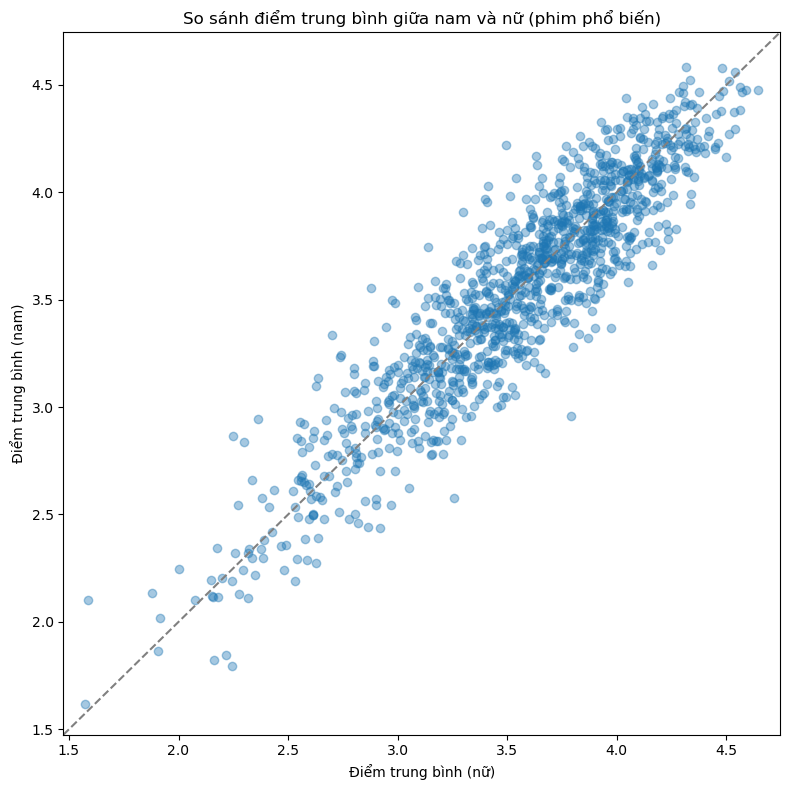

In [20]:
plt.figure(figsize=(8,8))
plt.scatter(mean_ratings["F"], mean_ratings["M"], alpha=0.4)
plt.xlabel("Điểm trung bình (nữ)")
plt.ylabel("Điểm trung bình (nam)")
plt.title("So sánh điểm trung bình giữa nam và nữ (phim phổ biến)")
lims = [mean_ratings[["F","M"]].min().min()-0.1, mean_ratings[["F","M"]].max().max()+0.1]
plt.plot(lims, lims, color='gray', linestyle='--')
plt.xlim(lims)
plt.ylim(lims)
plt.tight_layout()
plt.show()

#### -> Biểu đồ thanh: phim có độ lệch chuẩn cao nhất

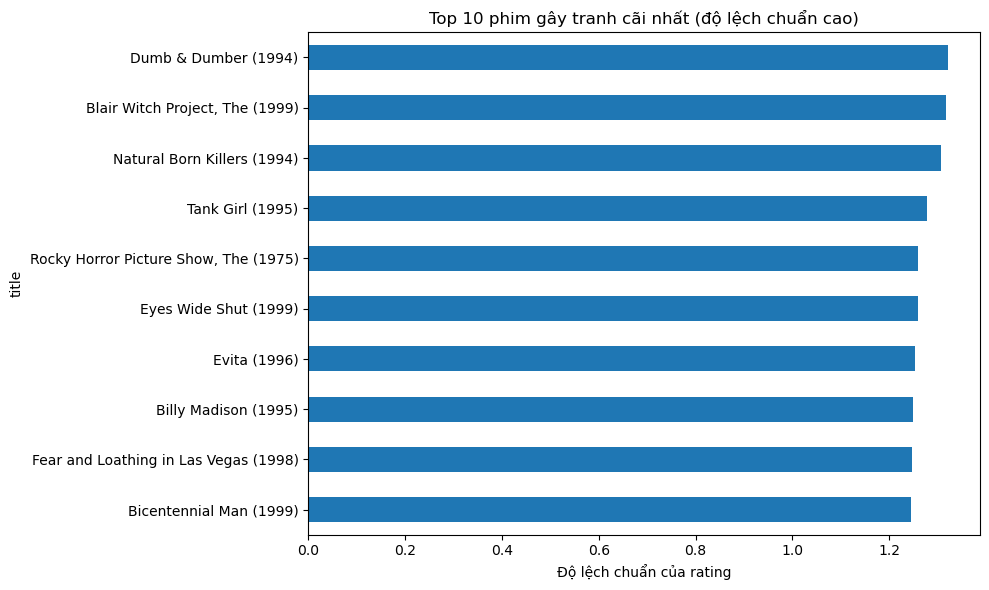

In [21]:
plt.figure(figsize=(10,6))
rating_std_by_title.head(10).sort_values().plot(kind="barh")
plt.title("Top 10 phim gây tranh cãi nhất (độ lệch chuẩn cao)")
plt.xlabel("Độ lệch chuẩn của rating")
plt.tight_layout()
plt.show()

#### Phim có chênh lệch điểm trung bình giới tính lớn nhất

In [22]:
mean_ratings["abs_diff"] = mean_ratings["diff"].abs()
most_gender_disagreement = mean_ratings.sort_values("abs_diff", ascending=False)
display(most_gender_disagreement.head(20)[["M","F","diff","abs_diff"]])

gender,M,F,diff,abs_diff
title,,,,
Dirty Dancing (1987),2.959596,3.790378,-0.830782,0.830782
"Good, The Bad and The Ugly, The (1966)",4.221300,3.494949,0.726351,0.726351
"Kentucky Fried Movie, The (1977)",3.555147,2.878788,0.676359,0.676359
Jumpin' Jack Flash (1986),2.578358,3.254717,-0.676359,0.676359
Dumb & Dumber (1994),3.336595,2.697987,0.638608,0.638608
"Longest Day, The (1962)",4.031447,3.411765,0.619682,0.619682
"Cable Guy, The (1996)",2.863787,2.250000,0.613787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.909283,3.297297,0.611985,0.611985
Grease (1978),3.367041,3.975265,-0.608224,0.608224


#### (Tùy chọn) Đặt lại nhãn cho nhóm tuổi

In [23]:
age_map = {1: "Dưới 18", 18: "18-24", 25: "25-34", 35: "35-44", 45: "45-49", 50: "50-55", 56: "56+"}
genre_ratings_renamed = genre_ratings.rename(columns=age_map)
display(genre_ratings_renamed.head())

age,Dưới 18,18-24,25-34,35-44,45-49,50-55,56+
genre,,,,,,,
Action,3.506385,3.447097,3.453358,3.538107,3.528543,3.611333,3.610709
Adventure,3.449975,3.408525,3.443163,3.515291,3.528963,3.628163,3.649064
Animation,3.476113,3.624014,3.701228,3.740545,3.734856,3.780020,3.756233
Children's,3.241642,3.294257,3.426873,3.518423,3.527593,3.556555,3.621822
Comedy,3.497491,3.460417,3.490385,3.561984,3.591789,3.646868,3.650949


# 📈 Tóm tắt dữ liệu so sánh
print("""
✅ Kết luận:
1️⃣ Nam và nữ có hành vi đánh giá khác nhau rõ rệt.
   → Nữ đánh giá cao các phim cảm xúc, nhân văn.
   → Nam chấm cao hơn ở các phim hành động, viễn tưởng.

2️⃣ Một số phim có độ lệch chuẩn cao → gây tranh cãi.
   → Phản ánh sự đa dạng gu xem phim.

3️⃣ Sở thích theo độ tuổi:
   → 18–24: Action, Sci-Fi
   → 25–34: Drama, Romance
   → 45+: Documentary, History

📌 Ứng dụng thực tế:
- Dữ liệu này dùng để xây dựng **hệ thống gợi ý phim (Recommendation System)**
- Cải thiện trải nghiệm cá nhân hóa theo giới tính, độ tuổi.
- Hỗ trợ chiến lược marketing và quảng cáo phù hợp từng nhóm khán giả.
""")
